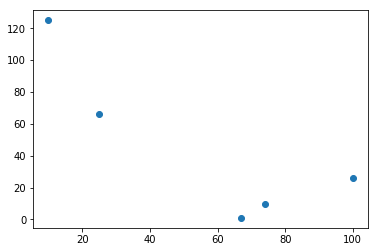

In [21]:
#3.7 Basic Plotting
import matplotlib.pyplot as plt

x = [10,  100, 25, 67, 74]
y = [125, 26,  66, 1,  10]

plt.scatter(x, y)

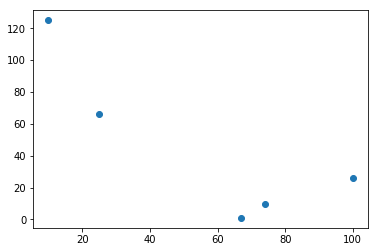

In [22]:
#3.7a Storing 2D Coordinates in a Single Data Structure
import numpy as np

xy = []
for i in range(len(x)):
    xy.append([x[i], y[i]])
xy = np.array(xy)

plt.scatter(xy[:, 0], xy[:, 1])

In [23]:
#3.8 Multidimensional Mean

xy_mean = np.mean(xy, axis=0)
print(xy.mean(axis=0))

[55.2 45.6]


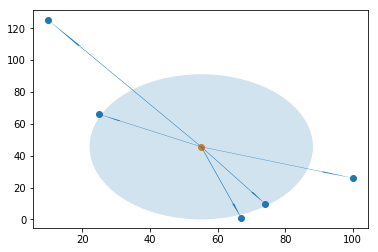

In [50]:
#3.9 Adding Graphical Overlays
import matplotlib.patches as patches

std_dev = np.std(xy, axis=0)

ellipse = patches.Ellipse([xy_mean[0], xy_mean[1]], std_dev[0]*2, std_dev[1]*2, alpha = 0.2)

fig, graph = plt.subplots()

graph.scatter(xy[:, 0], xy[:, 1])
graph.scatter(xy_mean[0], xy_mean[1])
graph.add_patch(ellipse)

#Testing adding arrows from mean point to the other points
for point in xy:
    dx = point[0] - xy_mean[0]
    dy = point[1] - xy_mean[1]
    
    arrow = patches.Arrow(xy_mean[0], xy_mean[1], dx, dy)
    graph.add_patch(arrow)

In [40]:
#3.10 Calculating the Distance to the Mean
dists = []
for point in xy:
    dists.append(np.linalg.norm(point-xy_mean))
print(dists)

[91.36410673782129, 48.89989775040434, 36.444478319767455, 46.13458572481171, 40.25916044827562]


In [41]:
#3.11 List Comprehension

dists = [np.linalg.norm(point-xy_mean) for point in xy]
print(dists)

[91.36410673782129, 48.89989775040434, 36.444478319767455, 46.13458572481171, 40.25916044827562]


In [44]:
#3.12 Normalisation in Python

xy_min = np.min(xy, axis=0)
xy_max = np.max(xy, axis=0)
norm = (xy - xy_min) / (xy_max - xy_min)

print(norm)

[[0.         1.        ]
 [1.         0.2016129 ]
 [0.16666667 0.52419355]
 [0.63333333 0.        ]
 [0.71111111 0.07258065]]


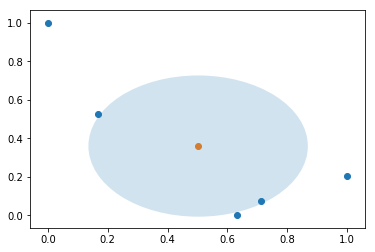

In [52]:
#3.13 Outliers and Plotting Normalised Data

norm_std_dev = np.std(norm, axis=0)
norm_mean = np.mean(norm, axis=0)

ellipse = patches.Ellipse([norm_mean[0], norm_mean[1]], norm_std_dev[0]*2, norm_std_dev[1]*2, alpha = 0.2)

fig, graph = plt.subplots()

graph.scatter(norm[:, 0], norm[:, 1])
graph.scatter(norm_mean[0], norm_mean[1])
graph.add_patch(ellipse)